# Example Streaming Statistics Algorithms

In [56]:
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import math, sys, os
from copy import deepcopy
from numpy.random import randn

# and pandas
import pandas as pd

## Sample Moments

In [103]:
class SampleMoments(object):
    
    def __init__(self):
        self.n = 0.0
        self.sum = 0.0
        self.mean = 0.0
        self._M2 = 0.0
        self.variance = 0.0
    
    def __repr__(self):
        return """<SampleMoments: count=%.8f, sum=%.8f, mean=%.8f, variance=%.8f>""" % (self.n, self.sum, self.mean, self.variance)
    
    def __eq__(self, other):
        n = self.n == other.n
        s = self.sum == other.sum
        m = self.mean == other.mean
        v = self.variance == other.variance
        return n and s and m and v
    
    
    def update(self, x):
        if not (type(x) == int) or (type(x) == float):
            raise TypeError("Incompatable type: %s" % str(type(x)))
        self.n += 1.0
        self.sum += float(x)
        delta = float(x - self.mean)
        self.mean += delta / float(self.n)
        self._M2 += delta**2
        if self.n < 2:
            self.variance = 0.0
        else:
            self.variance = self._M2 / float(self.n - 1)

    def batch_update(self, arg):
        if (type(arg) == list) or (type(arg) == np.ndarray):
            data = arg
        elif (type(arg) == int) or (type(arg) == float):
            data = [arg]
        else:
            raise TypeError("Incompatable type: %s" % str(type(arg)))
        
        for x in data:
            self.update(x)


<SampleMoments: count=0.00000000, sum=0.00000000, mean=0.00000000, variance=0.00000000>
<SampleMoments: count=5.00000000, sum=10.00000000, mean=2.00000000, variance=3.37500000>
<SampleMoments: count=10.00000000, sum=45.00000000, mean=4.50000000, variance=10.66666667>
<SampleMoments: count=100.00000000, sum=945.00000000, mean=9.45000000, variance=3.87602436>


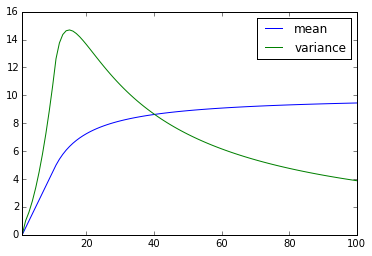

In [104]:
a0 = [0,1,2,3,4]
a1 = [5,6,7,8,9]
a2 = [10]*90

SM = SampleMoments()
print(SM)
SM.batch_update(a0)
print(SM)
SM.batch_update(a1)
print(SM)
SM.batch_update(a2)
print(SM)



MU = []
SIGMA = []
SM = SampleMoments()
data = a0 + a1 + a2
N = range(1,len(data) + 1)
for i in data:
    SM.update(i)
    MU += [SM.mean]
    SIGMA += [SM.variance]

# plot it
MU = pd.Series(MU, index = N)
SIGMA = pd.Series(SIGMA, index = N)
pd.concat([MU,SIGMA],axis=1,keys=['mean', 'variance']).plot()



## Iterpolation based Approximate Histogram

### tDigest

There are very good, optimized, implimentations freely available.

[paper](https://github.com/tdunning/t-digest/blob/master/docs/t-digest-paper/histo.pdf)
[java](https://github.com/tdunning/t-digest)
[python](https://github.com/CamDavidsonPilon/tdigest/blob/master/tdigest/tdigest.py)

My own quick, scala implimentation can be found as a Gist [here](https://gist.github.com/RobColeman/c4c948f6365dc788a09d).